In [9]:
!pip install missingno
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno  # ✅ Correct spelling
import warnings
warnings.filterwarnings('ignore')

sns.set()
plt.style.use('ggplot')


In [17]:
df = pd.read_csv(r"C:\Users\DELL\Desktop\Breast Cancer Classification Using ML\breast_cancer.csv")

In [19]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [23]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [ ]:
# M - Malignint
# B - Benign

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [29]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

<Axes: >

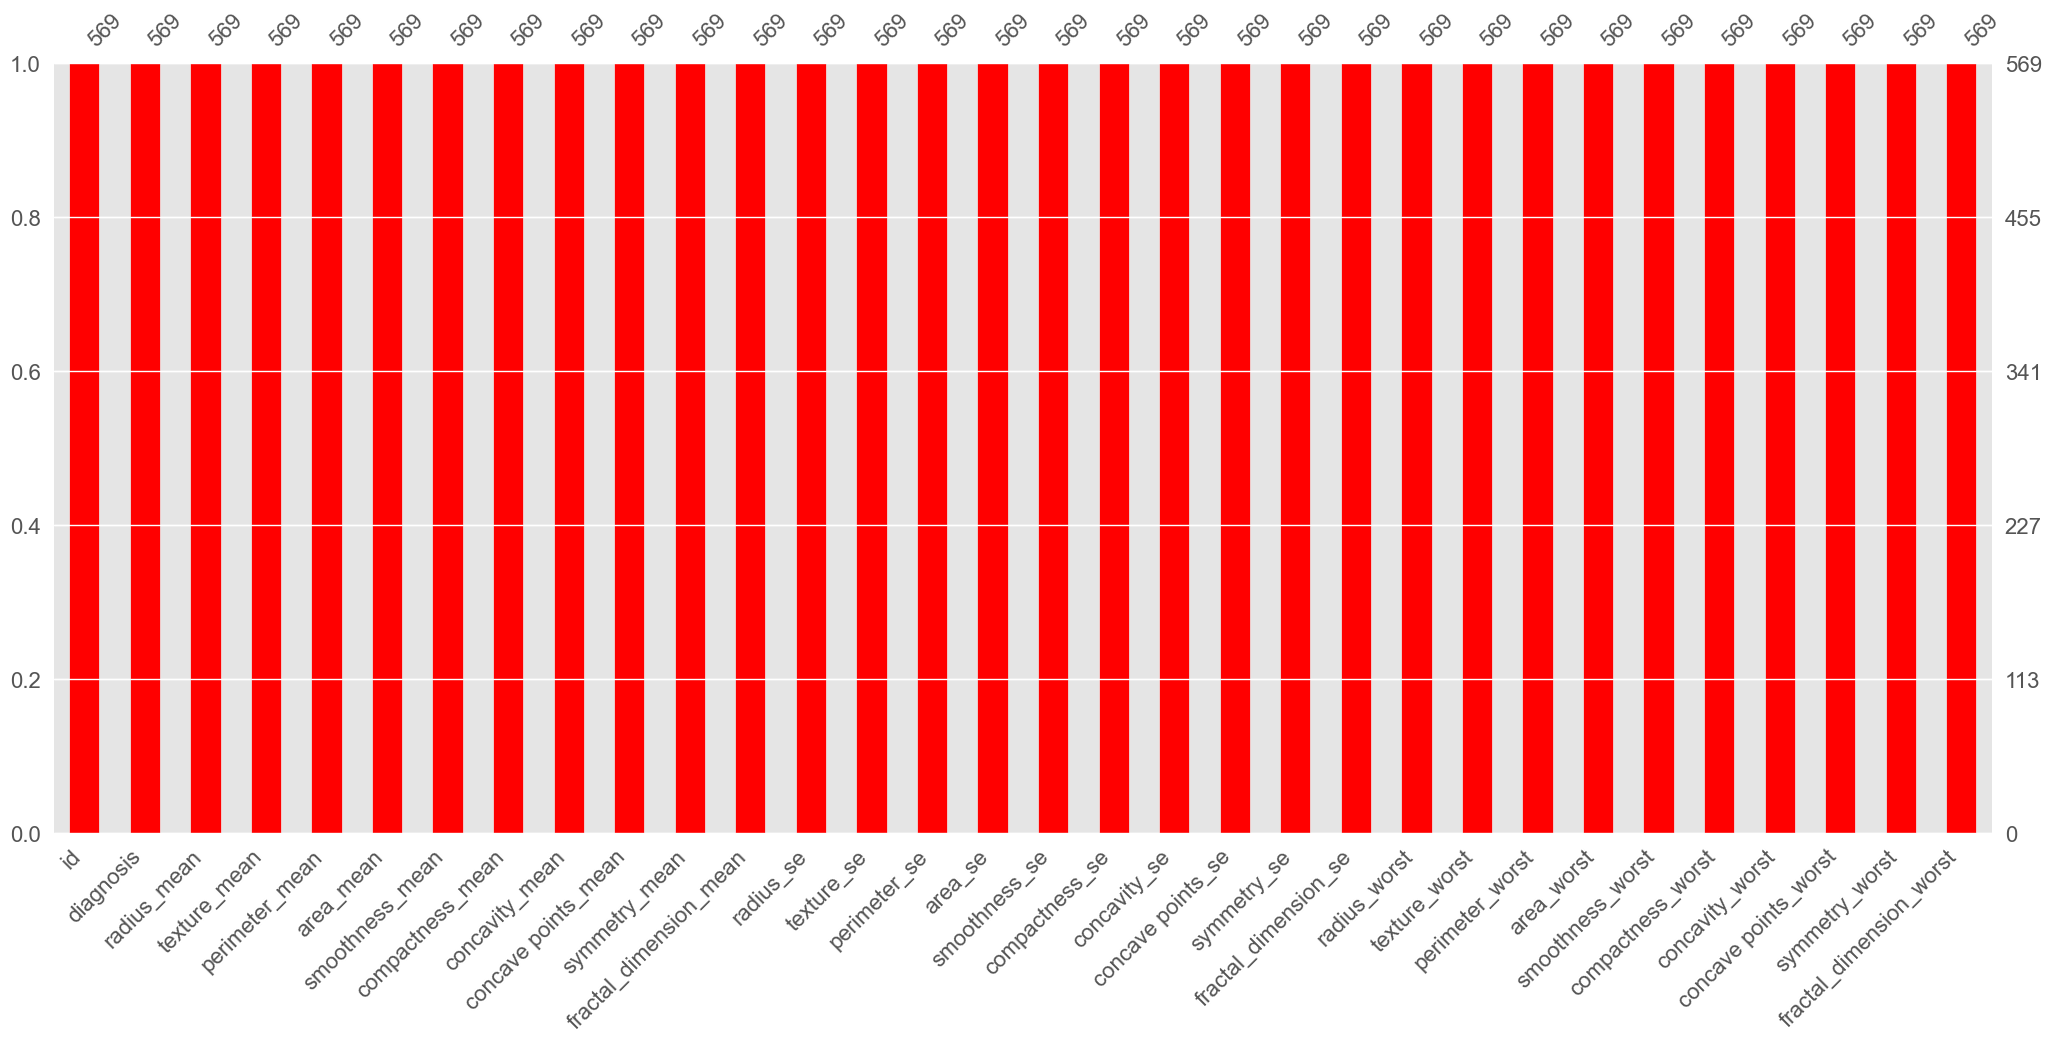

In [43]:
msno.bar(df, color="red")

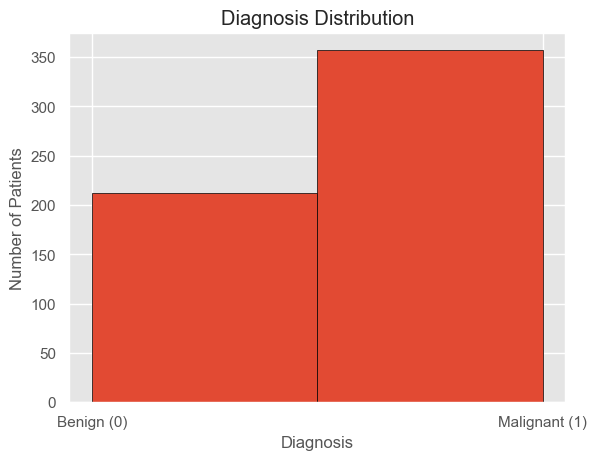

In [47]:
plt.hist(df['diagnosis'], bins=2, edgecolor='black')
plt.xticks([0, 1], ['Benign (0)', 'Malignant (1)'])
plt.title('Diagnosis Distribution')
plt.xlabel('Diagnosis')
plt.ylabel('Number of Patients')
plt.show()


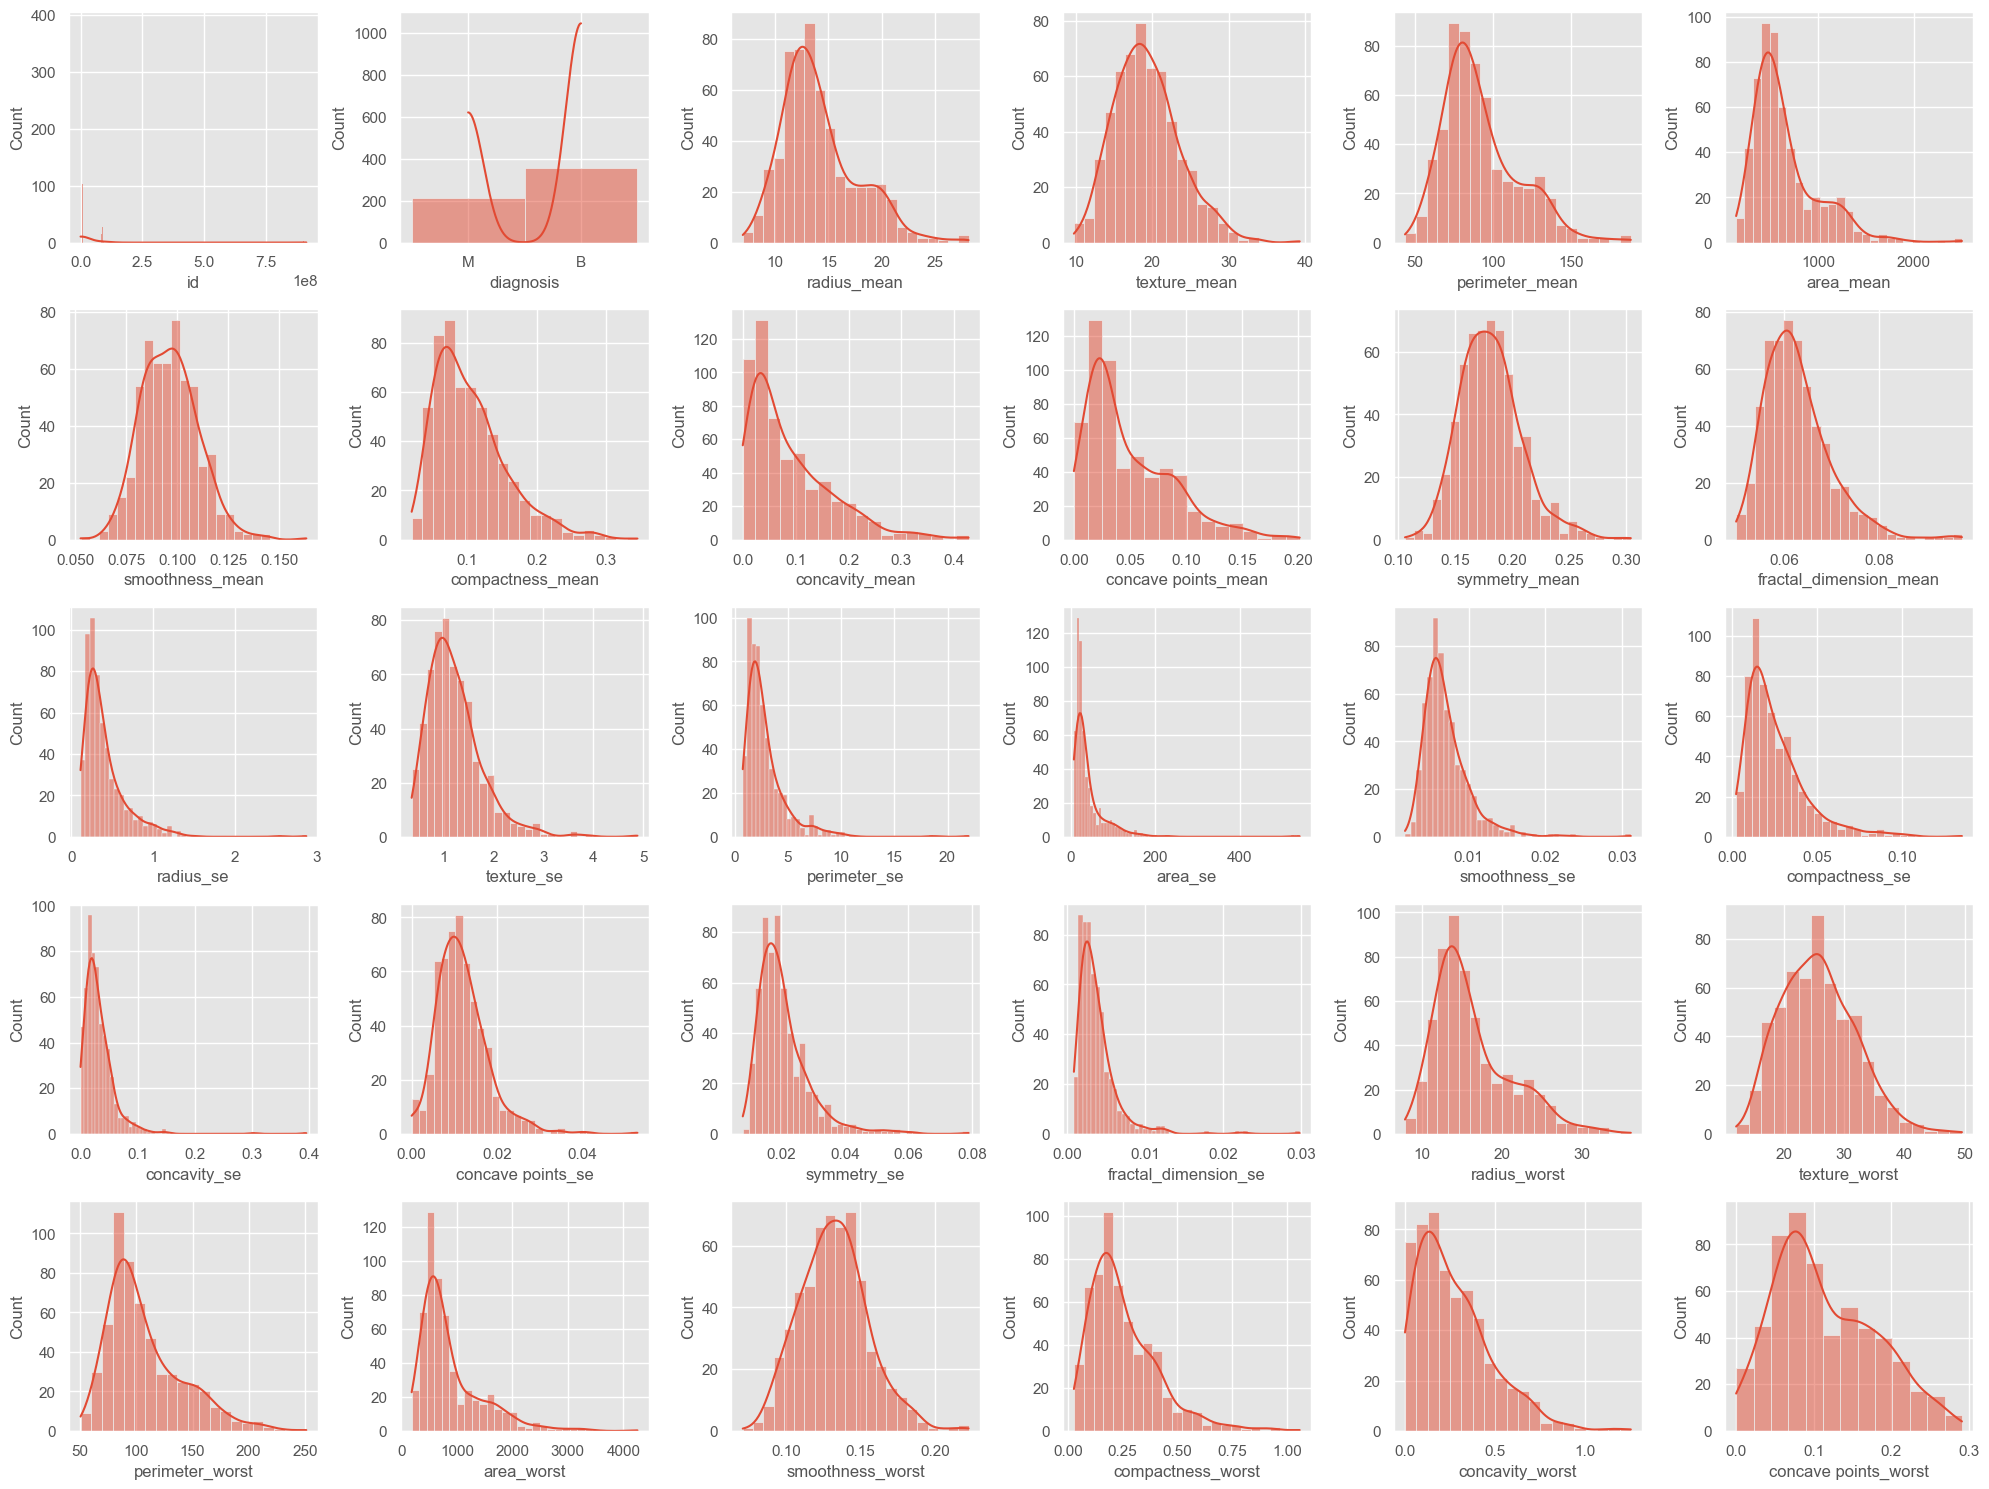

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 15))  # Set the figure size
plotnumber = 1                # Start from the first subplot

for column in df.columns:    # Loop through each column in the DataFrame
    if plotnumber <= 30:     # Limit to 30 plots (to avoid overcrowding)
        ax = plt.subplot(5, 6, plotnumber)  # Create subplot in 5 rows x 6 columns layout
        sns.histplot(df[column], kde=True, ax=ax)  # Plot distribution with KDE (smooth curve)
        plt.xlabel(column)    # Set x-axis label to the column name
        plotnumber += 1       # Move to next subplot

plt.tight_layout()  # Prevent subplot labels from overlapping
plt.show()          # Show all plots


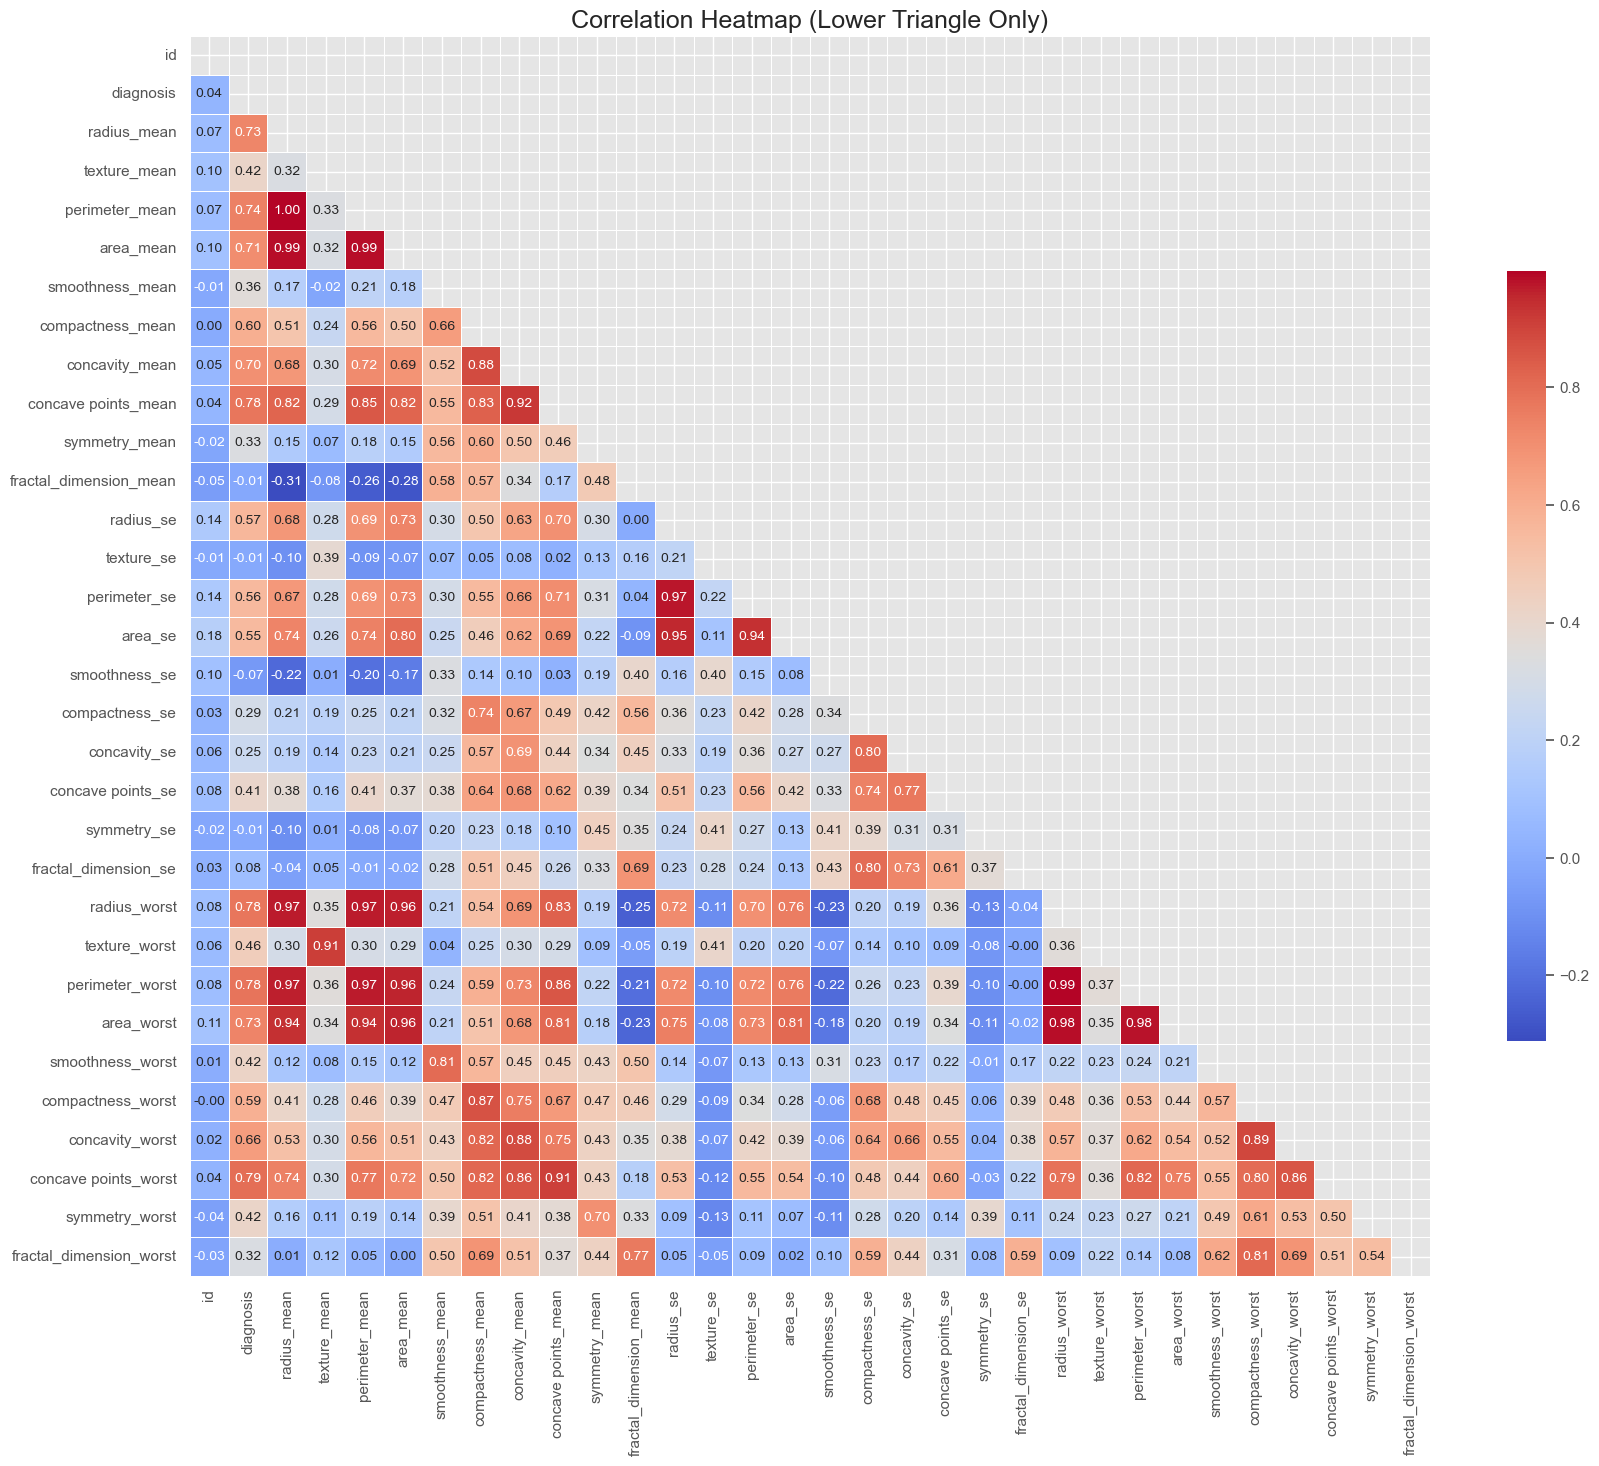

In [59]:




corr = df.corr()

#a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(20, 20))

#Draw the heatmap with the mask
sns.heatmap(
    corr, 
    mask=mask, 
    annot=True,         # Show correlation values
    fmt=".2f",          # Format to 2 decimal places
    cmap='coolwarm',    # Color map: blue to red
    square=True,        # Square cells
    linewidths=0.5,     # Gridlines between cells
    cbar_kws={"shrink": 0.5}  # Shrink color bar
)

# Step 6: Add title
plt.title("Correlation Heatmap (Lower Triangle Only)", fontsize=18)
plt.show()


In [ ]:
# Highly Correlated Feature

In [61]:
df.drop('id', axis=1, inplace=True)

In [65]:
# feature selection
corr_matrix = df.corr().abs()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

tri_df = corr_matrix.mask(mask)

to_drop = [column for column in tri_df.columns if any(tri_df[column] > 0.92)]

df = df.drop(to_drop, axis=1)

print(df.shape[1])

23


In [67]:
df.head()

,diagnosis,texture_mean,smoothness_mean,compactness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,...,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,10.38,0.11840,0.27760,0.14710,0.2419,0.07871,0.9053,153.40,0.006399,...,0.03003,0.006193,17.33,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,17.77,0.08474,0.07864,0.07017,0.1812,0.05667,0.7339,74.08,0.005225,...,0.01389,0.003532,23.41,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,21.25,0.10960,0.15990,0.12790,0.2069,0.05999,0.7869,94.03,0.006150,...,0.02250,0.004571,25.53,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,20.38,0.14250,0.28390,0.10520,0.2597,0.09744,1.1560,27.23,0.009110,...,0.05963,0.009208,26.50,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,14.34,0.10030,0.13280,0.10430,0.1809,0.05883,0.7813,94.44,0.011490,...,0.01756,0.005115,16.67,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [69]:
# from 32 to 23

In [73]:
x=df.drop('diagnosis',axis=1)
y=df['diagnosis']

In [105]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=0)

In [81]:
# Scaling the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [85]:
x_train.shape

(455, 22)

In [ ]:
# Apply Machine Learning Algorithm

In [107]:
from sklearn.linear_model import LogisticRegression

# Create the model
log_reg = LogisticRegression()

# Fit (train) the model
log_reg.fit(x_train, y_train)


LogisticRegression()

In [111]:
y_pred = log_reg.predict(x_test)

In [113]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0], dtype=int64)

In [119]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Training Accuracy:", accuracy_score(y_train, log_reg.predict(x_train)))

log_reg_acc = accuracy_score(y_train, log_reg.predict(x_train))


Training Accuracy: 0.9538461538461539


In [121]:

print("Test Accuracy:", accuracy_score(y_test, log_reg.predict(x_test)))


Test Accuracy: 0.956140350877193


In [123]:
print(confusion_matrix(y_test, y_pred))

[[65  2]
 [ 3 44]]


In [125]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96        67
           1       0.96      0.94      0.95        47

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [135]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)


KNeighborsClassifier()

In [137]:
from sklearn.metrics import accuracy_score

# Predict and evaluate
y_pred_knn = knn.predict(x_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))


KNN Accuracy: 0.9649122807017544


In [143]:
y_pred = log_reg.predict(x_test)

In [145]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0], dtype=int64)

In [149]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Train the model
knn = KNeighborsClassifier()   # You can add n_neighbors=5 or another value if you want to try different K
knn.fit(x_train, y_train)

# 2. Accuracy on Training Set
train_acc_knn = accuracy_score(y_train, knn.predict(x_train))
print("KNN Training Accuracy:", train_acc_knn)

# 3. Accuracy on Test Set
y_pred_knn = knn.predict(x_test)
test_acc_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Test Accuracy:", test_acc_knn)

# 4. Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("\nKNN Confusion Matrix:\n", cm_knn)

# 5. Classification Report
print("\nKNN Classification Report:\n", classification_report(y_test, y_pred_knn))


KNN Training Accuracy: 0.9230769230769231
KNN Test Accuracy: 0.9649122807017544

KNN Confusion Matrix:
 [[64  3]
 [ 1 46]]

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97        67
           1       0.94      0.98      0.96        47

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



In [154]:
# SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train the model
svm = SVC(kernel='linear')  
svm.fit(x_train, y_train)

# Predict
y_pred_svm = svm.predict(x_test)

# Evaluate
print("SVM Training Accuracy:", accuracy_score(y_train, svm.predict(x_train)))
print("SVM Test Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))


SVM Training Accuracy: 0.9626373626373627
SVM Test Accuracy: 0.9649122807017544
Confusion Matrix:
 [[64  3]
 [ 1 46]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97        67
           1       0.94      0.98      0.96        47

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



In [160]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Train the model
dt = DecisionTreeClassifier(random_state=0)
dt.fit(x_train, y_train)

# 2. Predict on test set
y_pred_dt = dt.predict(x_test)

# 3. Accuracy
print("DT Training Accuracy:", accuracy_score(y_train, dt.predict(x_train)))
print("DT Test Accuracy:", accuracy_score(y_test, y_pred_dt))

# 4. Confusion Matrix
print("\nDecision Tree Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

# 5. Classification Report
print("\nDecision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))


DT Training Accuracy: 1.0
DT Test Accuracy: 0.9210526315789473

Decision Tree Confusion Matrix:
 [[60  7]
 [ 2 45]]

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.90      0.93        67
           1       0.87      0.96      0.91        47

    accuracy                           0.92       114
   macro avg       0.92      0.93      0.92       114
weighted avg       0.93      0.92      0.92       114



In [162]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Initialize and train the model
rf = RandomForestClassifier(random_state=0)  # You can set n_estimators=100, max_depth=5, etc.
rf.fit(x_train, y_train)

# 2. Predict
y_pred_rf = rf.predict(x_test)

# 3. Evaluate
print("Random Forest Training Accuracy:", accuracy_score(y_train, rf.predict(x_train)))
print("Random Forest Test Accuracy:", accuracy_score(y_test, y_pred_rf))

# 4. Confusion Matrix
print("\nRandom Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# 5. Classification Report
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Training Accuracy: 1.0
Random Forest Test Accuracy: 0.9912280701754386

Random Forest Confusion Matrix:
 [[67  0]
 [ 1 46]]

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        67
           1       1.00      0.98      0.99        47

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



In [181]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Train the model
gb = GradientBoostingClassifier(random_state=0)
gb.fit(x_train, y_train)

# 2. Predict on test set
y_pred_gb = gb.predict(x_test)

# 3. Accuracy scores
print("Gradient Boosting Training Accuracy:", accuracy_score(y_train, gb.predict(x_train)))
print("Gradient Boosting Test Accuracy:", accuracy_score(y_test, y_pred_gb))

# 4. Confusion Matrix
print("\nGradient Boosting Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))

# 5. Classification Report
print("\nGradient Boosting Classification Report:\n", classification_report(y_test, y_pred_gb))


Gradient Boosting Training Accuracy: 1.0
Gradient Boosting Test Accuracy: 0.956140350877193

Gradient Boosting Confusion Matrix:
 [[64  3]
 [ 2 45]]

Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96        67
           1       0.94      0.96      0.95        47

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [185]:
!pip install xgboost

In [190]:

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Initialize and Train
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0)
xgb.fit(x_train, y_train)

# 2. Predict
y_pred_xgb = xgb.predict(x_test)

# 3. Accuracy Scores
print("XGBoost Training Accuracy:", accuracy_score(y_train, xgb.predict(x_train)))
print("XGBoost Test Accuracy:", accuracy_score(y_test, y_pred_xgb))

# 4. Confusion Matrix
print("\nXGBoost Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

# 5. Classification Report
print("\nXGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))


XGBoost Training Accuracy: 1.0
XGBoost Test Accuracy: 0.9736842105263158

XGBoost Confusion Matrix:
 [[65  2]
 [ 1 46]]

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98        67
           1       0.96      0.98      0.97        47

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [193]:
# Comparing all models 

In [201]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score

# Create a dictionary of models
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Store results
results = []

# Train & evaluate each model
for name, model in models.items():
    model.fit(x_train, y_train)
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    recall_malignant = recall_score(y_test, y_test_pred, pos_label=1)  # 'M' = Malignant

    results.append({
        "Model": name,
        "Train Accuracy": round(train_acc, 4),
        "Test Accuracy": round(test_acc, 4),
        "Recall (Malignant)": round(recall_malignant, 4)
    })

# Convert results to a DataFrame and display
results_df = pd.DataFrame(results)
print(results_df.sort_values(by="Test Accuracy", ascending=False).reset_index(drop=True))


                 Model  Train Accuracy  Test Accuracy  Recall (Malignant)
0    Gradient Boosting          1.0000         0.9737              0.9787
1              XGBoost          1.0000         0.9737              0.9787
2                  KNN          0.9231         0.9649              0.9787
3        Random Forest          1.0000         0.9649              0.9362
4  Logistic Regression          0.9538         0.9561              0.9362
5                  SVM          0.9099         0.9298              0.8511
6        Decision Tree          1.0000         0.9298              0.9574


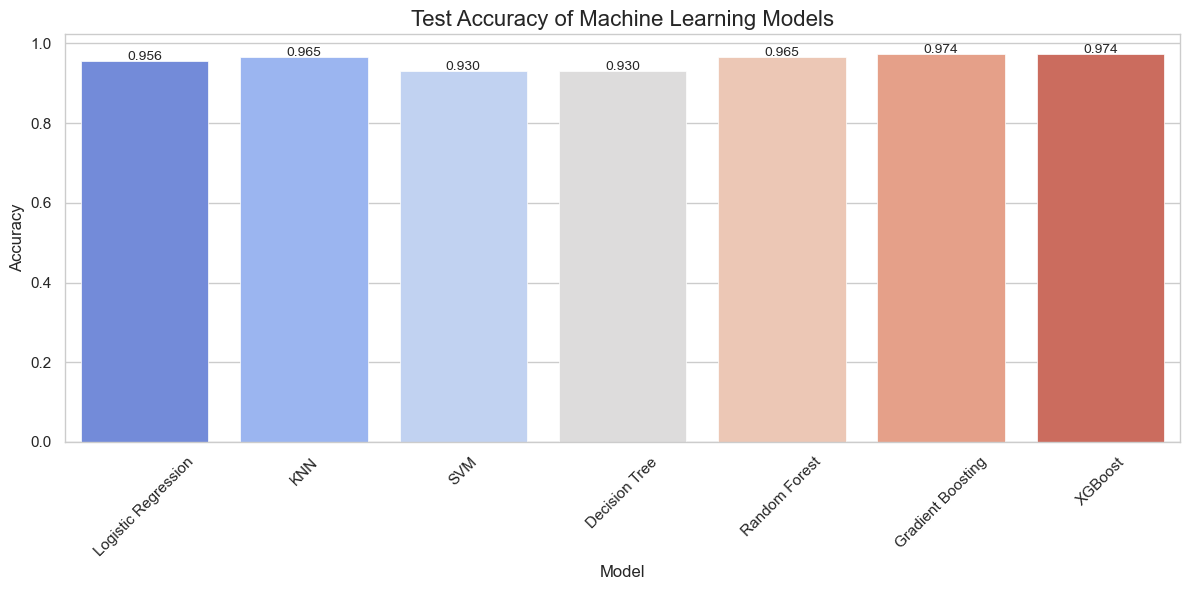

In [203]:
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Barplot of Test Accuracy
sns.barplot(x="Model", y="Test Accuracy", data=results_df, palette="coolwarm")

# Add value labels on top of bars
for i, value in enumerate(results_df["Test Accuracy"]):
    plt.text(i, value + 0.003, f"{value:.3f}", ha='center', fontsize=10)

# Titles and labels
plt.title("Test Accuracy of Machine Learning Models", fontsize=16)
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

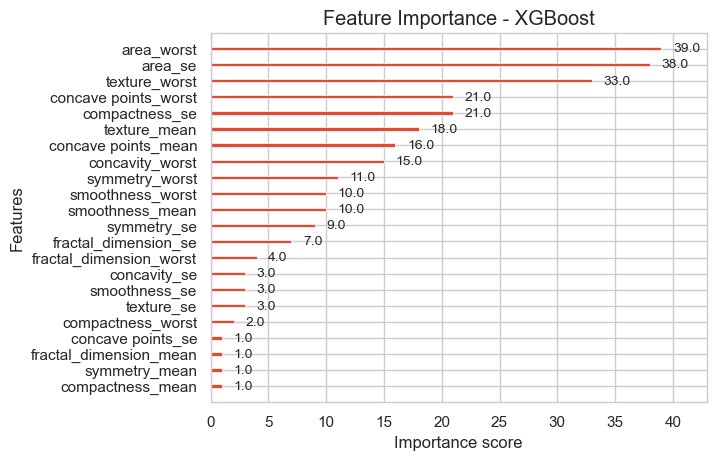

In [205]:
from xgboost import plot_importance
plot_importance(xgb)
plt.title("Feature Importance - XGBoost")
plt.show()


In [207]:
import joblib
joblib.dump(xgb, "xgboost_breast_cancer_model.pkl")


['xgboost_breast_cancer_model.pkl']

In [209]:
model = joblib.load("xgboost_breast_cancer_model.pkl")
